In [44]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('gld_price_data.csv.xls')

In [4]:
data.shape

(2290, 6)

In [5]:
data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [6]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [19]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [29]:
data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [30]:
data['Date']=pd.to_datetime(data['Date'])

In [31]:
col = data.corr()

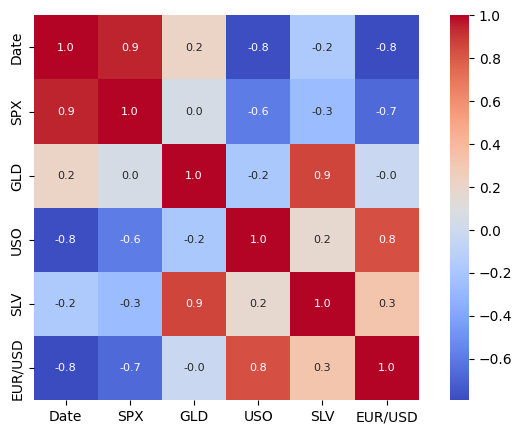

In [33]:
plot = plt.figure(figsize=(8,5))
sns.heatmap(col, cmap='coolwarm', square=True, fmt='.1f', annot=True, cbar=True, annot_kws={'size':8})
plt.show()

In [36]:
print(col['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/var/folders/0t/tlg8p4n91y1g2zyg12tmx_n00000gn/T/ipykernel_41982/3497747250.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GLD'], color='blue')


<Axes: xlabel='GLD', ylabel='Density'>

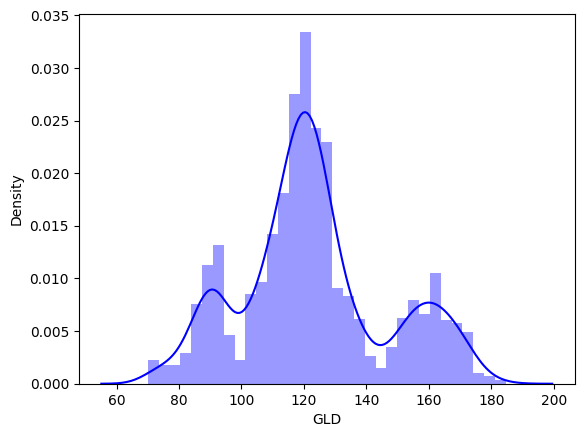

In [37]:
sns.distplot(data['GLD'], color='blue')

In [38]:
print(data['GLD'])

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [41]:
X = data.drop(columns=(['Date','GLD']), axis=1)
y = data['GLD']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [43]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1832, 4) (458, 4) (1832,) (458,)


In [58]:
model = RandomForestRegressor(n_estimators=100)

In [59]:
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [60]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [61]:
error = metrics.r2_score(y_train, train_pred)
print(error)

0.9984591694339853


In [62]:
error_1 = metrics.r2_score(y_test, test_pred)
print(error_1)

0.9893389743474286


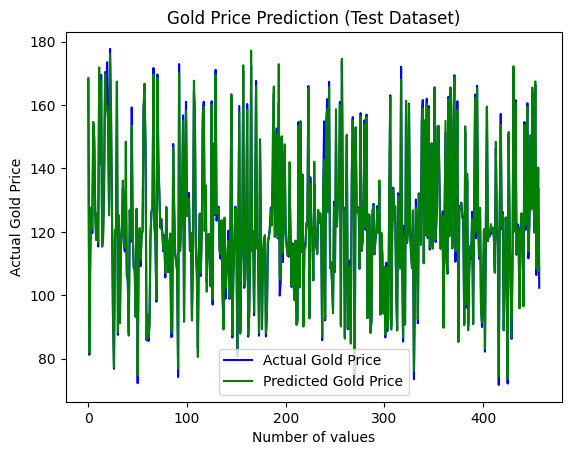

In [69]:
y_test = list(y_test)
test_pred = list(test_pred)
plt.plot(y_test, color='blue', label='Actual Gold Price')
plt.plot(test_pred, color='green', label='Predicted Gold Price')
plt.title("Gold Price Prediction (Test Dataset)")
plt.xlabel('Number of values')
plt.ylabel('Actual Gold Price')
plt.legend()
plt.show()

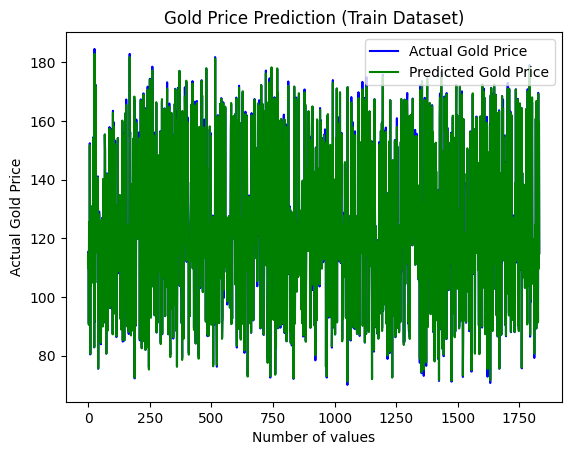

In [68]:
y_train = list(y_train)
train_pred = list(train_pred)
plt.plot(y_train, color='blue', label='Actual Gold Price')
plt.plot(train_pred, color='green', label='Predicted Gold Price')
plt.title("Gold Price Prediction (Train Dataset)")
plt.xlabel('Number of values')
plt.ylabel('Actual Gold Price')
plt.legend()
plt.show()